<a href="https://colab.research.google.com/github/frasercrichton/fastai2-learning/blob/feature%2Fstep-by-step/nbs/drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drone Tutorial

## Setup the Virtual Machine
 


In [2]:
%matplotlib inline
bs = 64     # default batch size
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

!pip install fastai2 -q

!pip install utils

from utils import *

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 184kB 4.6MB/s 



## Images 

The images for the project are held in Google Drive and can be mounted below.

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Images:

In [34]:
from fastai2.vision.all import *
path = Path('/content/gdrive/My Drive/fastai-v3'); path

Path('/content/gdrive/My Drive/fastai-v3')

In [42]:
dataset = path/'dataset'; dataset
dataset.ls()

(#6) [Path('/content/gdrive/My Drive/fastai-v3/dataset/RQ-4_Global_Hawk'),Path('/content/gdrive/My Drive/fastai-v3/dataset/MQ-19_Aerosonde'),Path('/content/gdrive/My Drive/fastai-v3/dataset/MQ-8B_Fire_ScoutMQ-8C_Fire_Scout'),Path('/content/gdrive/My Drive/fastai-v3/dataset/MQ-1_Predator'),Path('/content/gdrive/My Drive/fastai-v3/dataset/MQ-9_Reaper'),Path('/content/gdrive/My Drive/fastai-v3/dataset/.DS_Store')]

In [43]:
Path.BASE_PATH = path # display all paths relative to dataset root
path.ls()

(#2) [Path('dataset'),Path('models')]

In [45]:
path_img = path/'dataset'
fnames = get_image_files(path_img)
fnames

(#90) [Path('dataset/RQ-4_Global_Hawk/000009.jpg'),Path('dataset/RQ-4_Global_Hawk/000012.jpg'),Path('dataset/RQ-4_Global_Hawk/000011.jpg'),Path('dataset/RQ-4_Global_Hawk/000019.jpg'),Path('dataset/RQ-4_Global_Hawk/000017.jpg'),Path('dataset/RQ-4_Global_Hawk/000016.jpg'),Path('dataset/RQ-4_Global_Hawk/000013.jpg'),Path('dataset/RQ-4_Global_Hawk/000014.jpg'),Path('dataset/RQ-4_Global_Hawk/000018.jpg'),Path('dataset/RQ-4_Global_Hawk/000015.jpg')...]

Create an Image Data loader and output the results
 

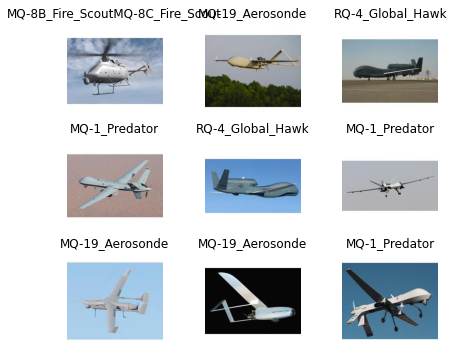

In [50]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func)
# , item_tfms=Resize(460), bs=bs, batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)]
dls.show_batch(max_n=9, figsize=(7,6))

Load the images into an image dataloader 

In [51]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.182544,3.691967,0.833333,00:01
1,2.990556,3.120035,0.888889,00:00
2,3.043214,2.840876,0.777778,00:00
3,3.104453,2.720595,0.777778,00:00


In [52]:
learn.save('stage-1')

In [53]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

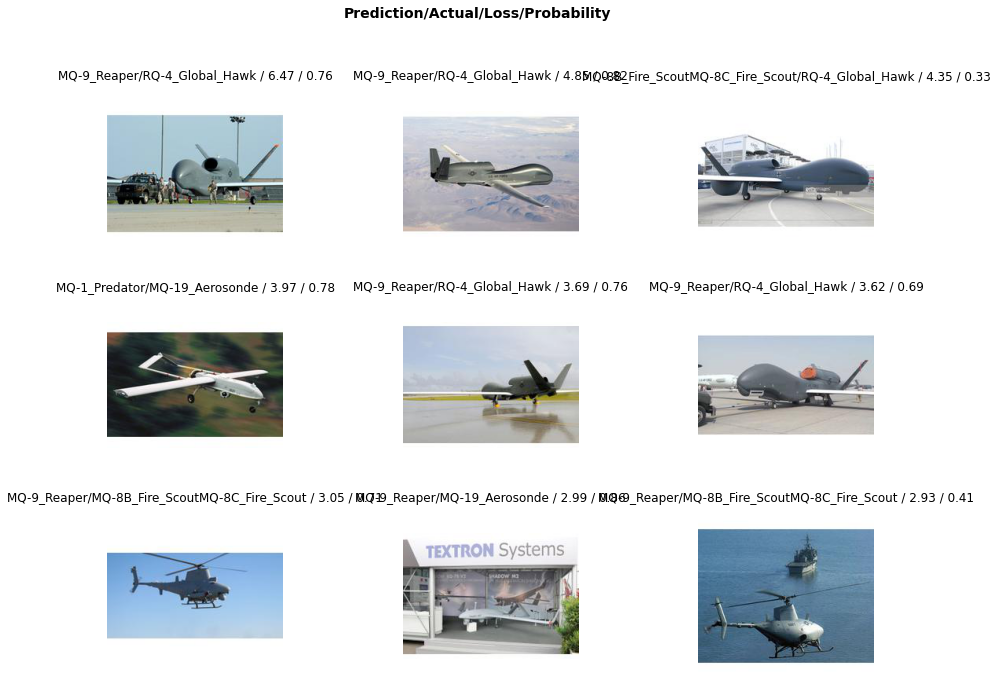

In [54]:
interp.plot_top_losses(9, figsize=(15,11))

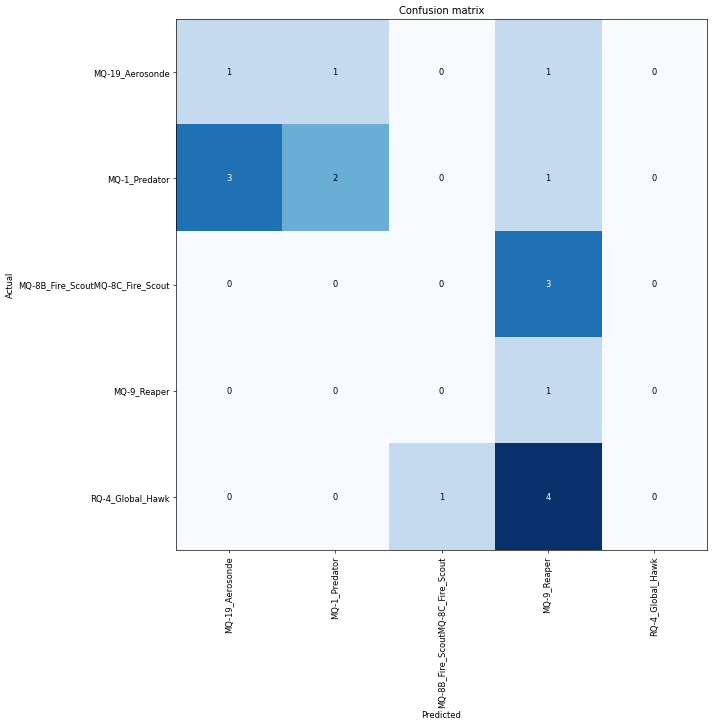

In [55]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

And everything appears confused for now:

In [56]:
interp.most_confused(min_val=2)

[('RQ-4_Global_Hawk', 'MQ-9_Reaper', 4),
 ('MQ-1_Predator', 'MQ-19_Aerosonde', 3),
 ('MQ-8B_Fire_ScoutMQ-8C_Fire_Scout', 'MQ-9_Reaper', 3)]